# ANN based classification of breast cancer

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("C:/Users/User/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.data")

In [5]:
data.columns = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension', 'SError Radius', 'SError Texture', 'SError Perimeter', 'SError Area', 'SError Smoothness', 'SError Compactness', 'SError Concavity', 'SError Concave Points', 'SError Symmetry', 'SError Fractal Dimension', 'largest Radius', 'largest Texture', 'largest Perimeter', 'largest Area', 'largest Smoothness', 'largest Compactness', 'largest Concavity', 'largest Concave Points', 'largest Symmetry', 'largest Fractal Dimension']

In [6]:
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,largest Radius,largest Texture,largest Perimeter,largest Area,largest Smoothness,largest Compactness,largest Concavity,largest Concave Points,largest Symmetry,largest Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=0,  test_size=0.2) 

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(30,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


46/46 [==============================] - 3s 5ms/step - loss: 84.1832 - accuracy: 0.5441
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 12.6963 - accuracy: 0.2026
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 4.8914 - accuracy: 0.2841
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0039 - accuracy: 0.6960
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3898 - accuracy: 0.8590
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.8855
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2670 - accuracy: 0.8921
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.9075
Epoch 9/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2350 - accuracy: 0.9119
Epoch 10/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3017 - accuracy: 0.8855
Epoch

In [13]:
pred = model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


In [14]:
binary_pred = (pred > 0.5).astype(int)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,binary_pred)
print(cm)

[[71  0]
 [17 26]]


<Axes: >

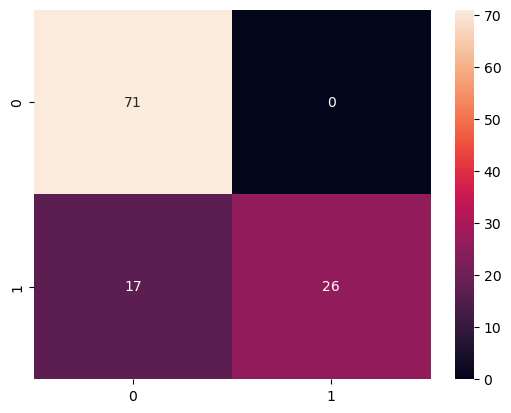

In [16]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [17]:
acc = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] +cm[1][1])
print("Accuracy : ",acc)

Accuracy :  0.8508771929824561


In [18]:
def predict_cancer (features):
    features_array = np.array(features). reshape(1, -1)
    print(features_array)
    pred = model.predict(features_array)
    if pred[0][0] >= 0.5:
        return "Malignant"
    else:
        return "Benign"

In [20]:
new_data = [8.878,15.49,56.74,241,0.08293,0.07698,0.04721,0.02381,0.193,0.06621,0.5381,1.2,4.277,30.18,0.01093,0.02899,0.03214,0.01506,0.02837,0.004174,9.981,17.7,65.27,302,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431]
predict = predict_cancer(new_data)
print("Prediction : ",predict)

[[8.878e+00 1.549e+01 5.674e+01 2.410e+02 8.293e-02 7.698e-02 4.721e-02
  2.381e-02 1.930e-01 6.621e-02 5.381e-01 1.200e+00 4.277e+00 3.018e+01
  1.093e-02 2.899e-02 3.214e-02 1.506e-02 2.837e-02 4.174e-03 9.981e+00
  1.770e+01 6.527e+01 3.020e+02 1.015e-01 1.248e-01 9.441e-02 4.762e-02
  2.434e-01 7.431e-02]]
1/1 [==============================] - 0s 43ms/step
Prediction :  Benign


In [22]:
new_data = [20.34,21.51,135.9,1264,0.117,0.1875,0.2565,0.1504,0.2569,0.0667,0.5702,1.023,4.012,69.06,0.005485,0.02431,0.0319,0.01369,0.02768,0.003345,25.3,31.86,171.1,1938,0.1592,0.4492,0.5344,0.2685,0.5558,0.1024]
predict = predict_cancer(new_data)
print("Prediction : ",predict)

[[2.034e+01 2.151e+01 1.359e+02 1.264e+03 1.170e-01 1.875e-01 2.565e-01
  1.504e-01 2.569e-01 6.670e-02 5.702e-01 1.023e+00 4.012e+00 6.906e+01
  5.485e-03 2.431e-02 3.190e-02 1.369e-02 2.768e-02 3.345e-03 2.530e+01
  3.186e+01 1.711e+02 1.938e+03 1.592e-01 4.492e-01 5.344e-01 2.685e-01
  5.558e-01 1.024e-01]]
1/1 [==============================] - 0s 50ms/step
Prediction :  Malignant
